In [1]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

In [2]:
import us
import copy
import tqdm.auto as tqdm

import geopandas as gpd
import numpy as np
import pandas as pd

from urbanstats.data.gpw import *

from collections import defaultdict, Counter
import requests

In [3]:
import io

In [124]:
from urbanstats.osm.trains import *

In [58]:
service_ids, service_id_maps, _, _ = standardize_calendars()

In [207]:
perths = []
for res in all_gtfs_info():
    if "f-r1r0-ptv" in str(res["feed"]).lower():
        perths.append(res)

  0%|          | 0/654 [00:00<?, ?it/s]

In [244]:
gtfs = perths[0]["gtfs_result"]()["content"]

In [248]:
stops, _ = pull_stops_for_gtfs(gtfs, is_bus_or_ferry_route_type)
# stops = gtfs["stops.txt"]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [249]:
stops[stops.stop_name == "Southern Cross Railway Station/Spencer St #122"]

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station,wheelchair_boarding,level_id
512,18187,Southern Cross Railway Station/Spencer St #122,-37.818539,144.953911,NaN,NaN,0,Level 0


In [250]:
stop_names, feed_ids, stop_lats, stop_lons, remap = standardized_stops()

  0%|          | 0/654 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter serve

In [251]:
edges = compute_stop_graph_within_radius(0.2, stop_lons, stop_lats)

In [252]:
first, second = np.array(edges).T
mask = feed_ids[first] != feed_ids[second]
first, second = first[mask], second[mask]

In [253]:
coords = np.array([stop_lats, stop_lons]).T

In [270]:
Counter(zip(feed_ids[first], feed_ids[second]))

Counter({('f-germany~regional~rail', 'f-nvbw~bwspnv'): 3006,
         ('f-nvbw~bwspnv', 'f-germany~regional~rail'): 2772,
         ('f-u3-günterangergüterverkehrsgmbh~coomnibusvermietungkg~fritzbeh',
          'f-germany~urban~transport'): 743,
         ('f-germany~urban~transport',
          'f-u3-günterangergüterverkehrsgmbh~coomnibusvermietungkg~fritzbeh'): 668,
         ('f-nvbw~hnv', 'f-nvbw~naldo'): 465,
         ('f-nvbw~naldo', 'f-nvbw~hnv'): 460,
         ('f-germany~urban~transport', 'f-germany~regional~rail'): 435,
         ('f-germany~regional~rail', 'f-germany~urban~transport'): 433,
         ('f-nvbw~vpe', 'f-nvbw~hnv'): 414,
         ('f-9q8y-sfmta', 'f-sf~bay~area~rg'): 404,
         ('f-nvbw~bwsbahnubahn', 'f-germany~regional~rail'): 403,
         ('f-nvbw~ding', 'f-nvbw~naldo'): 394,
         ('f-sf~bay~area~rg', 'f-9q8y-sfmta'): 391,
         ('f-nvbw~bodo', 'f-nvbw~ding'): 390,
         ('f-nvbw~vgf', 'f-nvbw~naldo'): 371,
         ('f-nvbw~vgf', 'f-nvbw~hnv'): 366,

In [280]:
grr = read_gtfs_from_feed_id("f-germany~regional~rail")["content"]
nvbw = read_gtfs_from_feed_id("f-nvbw~bwspnv")["content"]

In [301]:
len(set(grr["agency.txt"].agency_name) & set(nvbw["agency.txt"].agency_name))

69

In [289]:
nvbw["agency.txt"]

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,K4,Hessische Landesbahn,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
1,OD,Sächsisch-Oberlausitzer Eisenbahngesellschaft,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
2,00,DB AG,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
3,BD,SDG Sächsische Dampfeisenbahngesellschaft mbH,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
4,V6,vlexx,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
...,...,...,...,...,...,...
104,RW,Pressnitztalbahn,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
105,MW,Mecklenburgische Bäderbahn Molli,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
106,NZ,DB Fernverkehr AG,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087
107,54,Ceske Drahy,https://www.bahn.de,Europe/Berlin,DE,+49 71120927087


In [271]:
select = np.where(
    (feed_ids[first] == "f-germany~regional~rail")
    & (feed_ids[second] == "f-nvbw~bwspnv")
)

In [272]:
first[select], second[select]

(array([19108, 23190, 22896, ..., 24773, 25417, 24772]),
 array([45913, 45916, 45915, ..., 48395, 48672, 48365]))

In [274]:
stop_names[first[select]]

array(['Bludenz', 'Nüziders', 'Nenzing', ..., 'Toender(Gr)',
       'Westerland(Sylt)', 'Toender st'], dtype='<U127')

In [275]:
stop_names[second[select]]

array(['Bludenz', 'Nüziders', 'Nenzing', ..., 'Toender (Gr)',
       'Westerland (Sylt)', 'Toender st'], dtype='<U127')

In [276]:
coords[first[select]]

array([[47.154724,  9.814564],
       [47.171078,  9.793551],
       [47.191563,  9.708253],
       ...,
       [54.899235,  8.872908],
       [54.906853,  8.31098 ],
       [54.9334  ,  8.8604  ]])

In [277]:
coords[second[select]]

array([[47.15467125,  9.81476822],
       [47.17066762,  9.79453816],
       [47.19156132,  9.70825497],
       ...,
       [54.89923403,  8.87291159],
       [54.9064478 ,  8.31200952],
       [54.93339936,  8.86039806]])

In [153]:
cc = connected_components(edges, len(stop_lons))

In [167]:
component = list(max(cc, key=len))

In [168]:
stop_lats[component].mean(), stop_lons[component].mean()

(37.794085771999995, -122.41080086400001)

array(['California St & Stockton St', 'California St & Taylor St',
       'California St & Battery St', 'California St & Battery St',
       'California St & Davis St', 'California St & Davis St',
       'California St & Davis St', 'California St & Drumm St',
       'California St & Front St', 'California St & Front St',
       'California St & Grant Ave', 'California St & Grant Ave',
       'California St & Hyde St', 'California St & Hyde St',
       'California St & Jones St', 'California St & Jones St',
       'California St & Kearny St', 'California St & Kearny St',
       'California St & Larkin St', 'California St & Larkin St',
       'California St & Leavenworth St', 'California St & Leavenworth St',
       'California St & Mason St', 'California St & Mason St',
       'California St & Montgomery St', 'California St & Montgomery St',
       'California St & Polk St', 'California St & Polk St',
       'California St & Powell St', 'California St & Powell St',
       'California St

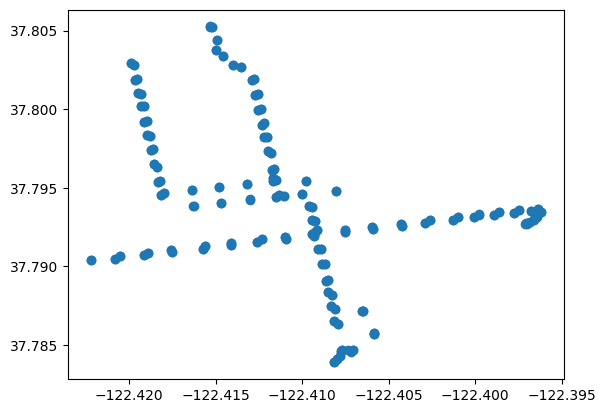

In [171]:
plt.scatter(stop_lons[component], stop_lats[component])
stop_names[component]

In [186]:
# stop_id_by_agency["f-9q8y-sfmta"]

In [69]:
invalid_types = {3, 4}

In [61]:
len(stop_id_by_agency)

1999

In [134]:
for i, x in enumerate(all_gtfs_info()):
    res = x["gtfs_result"]()
    if res["status"] == "failure":
        continue
    gtfs = res["content"]
    name, lat, lon, remap = pull_stops_for_gtfs_arrays(
        gtfs, is_bus_or_ferry_route_type, 0
    )
    # print(x["feed"]["id"])
    # print(res["status"])

  0%|          | 0/654 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [131]:
import matplotlib.pyplot as plt

In [133]:
remap

{13266: 0,
 13311: 1,
 13318: 2,
 17065: 3,
 13358: 4,
 13361: 5,
 13385: 6,
 13376: 7,
 13387: 8,
 17449: 9,
 13403: 10,
 13538: 11,
 13537: 12,
 13599: 13,
 13600: 14,
 13601: 15,
 13603: 16,
 13602: 17,
 17869: 18,
 17872: 19,
 17166: 20,
 17397: 21,
 17999: 22,
 15418: 23,
 17399: 24,
 17395: 25,
 17398: 26,
 17396: 27,
 13092: 28,
 13095: 29,
 13716: 30,
 13715: 31,
 13717: 32,
 13719: 33,
 13718: 34,
 17444: 35,
 13849: 36,
 17294: 37,
 13855: 38,
 13857: 39,
 13860: 40,
 13864: 41,
 13863: 42,
 13865: 43,
 13866: 44,
 13868: 45,
 13867: 46,
 13869: 47,
 13870: 48,
 13872: 49,
 13871: 50,
 13873: 51,
 13874: 52,
 13878: 53,
 13877: 54,
 13881: 55,
 13880: 56,
 13882: 57,
 13883: 58,
 13889: 59,
 13888: 60,
 13890: 61,
 13891: 62,
 13895: 63,
 13894: 64,
 13900: 65,
 13899: 66,
 13901: 67,
 13902: 68,
 17142: 69,
 13909: 70,
 13911: 71,
 13912: 72,
 13913: 73,
 13914: 74,
 13915: 75,
 17876: 76,
 13985: 77,
 13984: 78,
 13987: 79,
 16218: 80,
 13994: 81,
 13995: 82,
 13996: 83,
 1

In [122]:
remap

{'16995': 'mtc:powell',
 '15417': 'mtc:powell',
 '70011': 'mtc:caltrain-4th-&-king',
 '70012': 'mtc:caltrain-4th-&-king',
 '70172': 'mtc:palo-alto-station',
 '70171': 'mtc:palo-alto-station',
 '16992': 'mtc:embarcadero-bart',
 '16997': 'mtc:civic-center-bart',
 '15727': 'mtc:civic-center-bart',
 '16994': 'mtc:montgomery-bart',
 '15731': 'mtc:montgomery-bart',
 'SI:GG': 'mtc:sfo',
 '64821': 'mtc:mountain-view-station',
 '64786': 'mtc:mountain-view-station',
 '70211': 'mtc:mountain-view-station',
 '70212': 'mtc:mountain-view-station',
 '65381': 'mtc:san-jose-diridon-station',
 '65374': 'mtc:san-jose-diridon-station',
 '70262': 'mtc:san-jose-diridon-station',
 '70261': 'mtc:san-jose-diridon-station',
 '70241': 'mtc:santa-clara-caltrain',
 '70242': 'mtc:santa-clara-caltrain',
 '17217': 'mtc:embarcadero-bart',
 '902202': 'mtc:fruitvale',
 '902201': 'mtc:fruitvale',
 '903401': 'mtc:walnut-creek-bart',
 '903402': 'mtc:walnut-creek-bart',
 '901902': 'mtc:daly-city-bart',
 '901901': 'mtc:daly-c

In [ ]:
i

In [102]:
pull_stops_for_gtfs(gtfs, is_bus_or_ferry_route_type)

,stop_id,stop_name,platform_code,stop_lat,stop_lon,zone_id,location_type,parent_station


In [90]:
gtfs["routes.txt"]

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_url,route_color,route_text_color
0,AKT:Authority:AKT_ID,AKT:Line:100,100,Arendal-Kristiansand,701,NaN,NaN,000000,FFFF00
1,AKT:Authority:AKT_ID,AKT:Line:1001,M1,Flekkerøy - Sørlandsparken,704,NaN,NaN,66FF33,000000
2,AKT:Authority:AKT_ID,AKT:Line:101,101,Eydehavn-Arendal-Grimstad N/S,704,NaN,NaN,000000,FFFF00
3,AKT:Authority:AKT_ID,AKT:Line:1010,10,Sykehuset - Kvadraturen,704,NaN,NaN,000000,FFFF00
4,AKT:Authority:AKT_ID,AKT:Line:1012,12,Kjos haveby - Justvik,704,NaN,NaN,000000,FFFF00
...,...,...,...,...,...,...,...,...,...
4141,VYX:Authority:1,VYX:Line:7,VY146,VY146 Måløy/Ulsteinvik-Stryn-Oslo,202,NaN,NaN,00685E,FFFFFF
4142,VYX:Authority:1,VYX:Line:84,VY51,Oslo Airport - Hemsedal,702,NaN,NaN,00685E,FFFFFF
4143,VYX:Authority:1,VYX:Line:89,VY361,Gol stasjon-Hemsedal,202,NaN,NaN,00685E,FFFFFF
4144,VYX:Authority:1,VYX:Line:98,S44,S44 Shuttle Oslo lufthavn,711,NaN,NaN,00685E,FFFFFF


In [63]:
gtfs = x["gtfs_result"]()["content"]

In [74]:
stops = sorted(stops_covered_by_valid_trips(gtfs, invalid_types))

In [79]:
stops[~stops.parent_station.isna()]

,stop_id,stop_code,stop_name,stop_lat,stop_lon,zone_id,stop_desc,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code


In [180]:
k = x["feed"]["id"]
x = compute_trip_stop_times(gtfs, service_id_maps[k], stop_id_by_agency[k])

In [185]:
# len(pickle.dumps(x)) / 1e9 * 2000

In [6]:
content = res["gtfs_result"]['content']

In [125]:
stops = all_stops().copy()
stops.lat = stops.lat.apply(parse_float)
stops.lon = stops.lon.apply(parse_float)

  0%|          | 0/654 [00:00<?, ?it/s]

In [128]:
gpd.GeoDataFrame(
    dict(feed_id=stops.feed_id), geometry=gpd.points_from_xy(stops.lon, stops.lat)
).to_file("/home/kavi/temp/coords.shp")

/home/kavi/anaconda3/envs/urbanstats-310/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [106]:
gtfses = {all_gtfs_info())

  0%|          | 0/654 [00:00<?, ?it/s]

In [131]:
a = [x for x in gtfses if "f-dr5r-mtanewyorkcitytransit" in x["feed"]["id"]]
a

[{'feed': {'id': 'f-dr5r-mtanewyorkcitytransit',
   'spec': 'gtfs',
   'urls': {'static_current': 'http://web.mta.info/developers/files/google_transit_supplemented.zip'},
   'license': {'commercial_use_allowed': 'yes', 'share_alike_optional': 'yes'},
   'tags': {'exclude_from_global_query': 'true', 'manual_import': 'true'}},
  'gtfs_result': <function urbanstats.osm.trains.all_gtfs_info.<locals>.<lambda>(feed={'id': 'f-dr5r-mtanewyorkcitytransit', 'spec': 'gtfs', 'urls': {'static_current': 'http://web.mta.info/developers/files/google_transit_supplemented.zip'}, 'license': {'commercial_use_allowed': 'yes', 'share_alike_optional': 'yes'}, 'tags': {'exclude_from_global_query': 'true', 'manual_import': 'true'}})>}]

In [139]:
nycmta = a[0]["gtfs_result"]()["content"]

In [141]:
nycmta.keys()

dict_keys(['agency.txt', 'shapes.txt', 'routes.txt', 'stops.txt', 'trips.txt', 'stop_times.txt', 'calendar.txt', 'calendar_dates.txt', 'transfers.txt'])

In [146]:
agencies = nycmta["agency.txt"]

In [143]:
stops = nycmta["stops.txt"]

In [153]:
stops

,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,101,Van Cortlandt Park-242 St,40.889248,-73.898583,1.0,NaN
1,101N,Van Cortlandt Park-242 St,40.889248,-73.898583,NaN,101
2,101S,Van Cortlandt Park-242 St,40.889248,-73.898583,NaN,101
3,103,238 St,40.884667,-73.900870,1.0,NaN
4,103N,238 St,40.884667,-73.900870,NaN,103
...,...,...,...,...,...,...
1492,S30N,Tompkinsville,40.636949,-74.074835,NaN,S30
1493,S30S,Tompkinsville,40.636949,-74.074835,NaN,S30
1494,S31,St George,40.643748,-74.073643,1.0,NaN
1495,S31N,St George,40.643748,-74.073643,NaN,S31


In [155]:
nycmta["trips.txt"]

,route_id,trip_id,service_id,trip_headsign,direction_id,shape_id
0,1,ASP25GEN-1038-Sunday-00_000600_1..S03R,Sunday,South Ferry,1,1..S03R
1,1,ASP25GEN-1038-Sunday-00_002600_1..S03R,Sunday,South Ferry,1,1..S03R
2,1,ASP25GEN-1038-Sunday-00_004600_1..S03R,Sunday,South Ferry,1,1..S03R
3,1,ASP25GEN-1038-Sunday-00_006600_1..S03R,Sunday,South Ferry,1,1..S03R
4,1,ASP25GEN-1038-Sunday-00_007200_1..N03R,Sunday,Van Cortlandt Park-242 St,0,1..N03R
...,...,...,...,...,...,...
82616,SI,SIR-FA2017-SI017-Weekday-08_138600_SI..S03R,Weekday_C24,Tottenville,1,SI..S03R
82617,SI,SIR-FA2017-SI017-Weekday-08_141100_SI..N03R,Weekday_C24,St George,0,SI..N03R
82618,SI,SIR-FA2017-SI017-Weekday-08_141600_SI..S03R,Weekday_C24,Tottenville,1,SI..S03R
82619,SI,SIR-FA2017-SI017-Weekday-08_144100_SI..N03R,Weekday_C24,St George,0,SI..N03R


In [149]:
nycmta["stop_times.txt"]

,trip_id,stop_id,arrival_time,departure_time,stop_sequence
0,ASP25GEN-1038-Sunday-00_000600_1..S03R,101S,00:06:00,00:06:00,1
1,ASP25GEN-1038-Sunday-00_000600_1..S03R,103S,00:07:30,00:07:30,2
2,ASP25GEN-1038-Sunday-00_000600_1..S03R,104S,00:09:00,00:09:00,3
3,ASP25GEN-1038-Sunday-00_000600_1..S03R,106S,00:10:30,00:10:30,4
4,ASP25GEN-1038-Sunday-00_000600_1..S03R,107S,00:12:00,00:12:00,5
...,...,...,...,...,...
2398612,SIR-FA2017-SI017-Weekday-08_147100_SI..N03R,S27N,25:03:00,25:03:00,17
2398613,SIR-FA2017-SI017-Weekday-08_147100_SI..N03R,S28N,25:06:00,25:06:00,18
2398614,SIR-FA2017-SI017-Weekday-08_147100_SI..N03R,S29N,25:08:00,25:08:00,19
2398615,SIR-FA2017-SI017-Weekday-08_147100_SI..N03R,S30N,25:10:00,25:10:00,20


In [156]:
nycmta["calendar.txt"]

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,Saturday,0,0,0,0,0,1,0,20250811,20251101
1,Saturday_C1,0,0,0,0,0,1,0,20250811,20251101
2,Sunday,0,0,0,0,0,0,1,20250811,20251101
3,Sunday_C9,0,0,0,0,0,0,1,20250811,20251101
4,Weekday,1,1,1,1,1,0,0,20250811,20251101
5,Weekday_C13,1,1,1,1,1,0,0,20250811,20251101
6,Weekday_C14,1,1,1,1,1,0,0,20250811,20251101
7,Weekday_C18,1,1,1,1,1,0,0,20250811,20251101
8,Weekday_C2,1,1,1,1,1,0,0,20250811,20251101
9,Weekday_C24,1,1,1,1,1,0,0,20250811,20251101


In [157]:
nycmta["calendar_dates.txt"]

,service_id,date,exception_type
0,L0S1,20251021,1
1,L0S2,20251022,1
2,L0S3,20251023,1
3,L0S4,20251024,1
4,L0S5,20251025,1
...,...,...,...
96,Weekday_C6,20251029,2
97,Weekday_C8,20250901,2
98,Weekday_C8,20251021,2
99,Weekday_C8,20251022,2


In [160]:
service_dates = joined_calendar_dates(nycmta)

In [161]:
service_dates

defaultdict(set,
            {'Saturday': {datetime.date(2025, 8, 16),
              datetime.date(2025, 8, 23),
              datetime.date(2025, 8, 30),
              datetime.date(2025, 9, 6),
              datetime.date(2025, 9, 13),
              datetime.date(2025, 9, 20),
              datetime.date(2025, 9, 27),
              datetime.date(2025, 10, 4),
              datetime.date(2025, 10, 11),
              datetime.date(2025, 10, 18),
              datetime.date(2025, 10, 25),
              datetime.date(2025, 11, 1)},
             'Saturday_C1': {datetime.date(2025, 8, 16),
              datetime.date(2025, 8, 23),
              datetime.date(2025, 8, 30),
              datetime.date(2025, 9, 6),
              datetime.date(2025, 9, 13),
              datetime.date(2025, 9, 20),
              datetime.date(2025, 9, 27),
              datetime.date(2025, 10, 4),
              datetime.date(2025, 10, 11),
              datetime.date(2025, 10, 18),
              datetime.date(

In [112]:
{k: v for k, v in Counter(x["feed"]["id"] for x in gtfses).items() if v > 1}

{'f-9myr-paloverdevalley~ca~us~rt': 2}

In [66]:
failures = all_failures()

  0%|          | 0/654 [00:00<?, ?it/s]

In [99]:
fail_ids = [x["id"] for x, _ in failures]
fail_ids = [
    x
    for x in fail_ids
    # if not any(
    #     x.startswith(pre) for pre in ["f-pony", "f-nextbike", "f-donkey~republic"]
    # )
    if not any(x.endswith(suf) for suf in ["~flex", "~gbfs", "~alerts", "~rt"])
]

In [100]:
len(fail_ids)

335

In [101]:
[x for x, _ in failures if x["id"] in fail_ids]

[{'id': 'f-w5q-songteaw~chiangmai',
  'spec': 'gtfs',
  'urls': {'static_current': 'http://119.59.102.211/gtfs/CM_CT_TH.zip'},
  'operators': [{'onestop_id': 'o-w5q-songteaw~chiangmai',
    'name': 'Song Teaw - Chiang Mai',
    'associated_feeds': [{'gtfs_agency_id': 'Yellow_bus'}]}]},
 {'id': 'f-w5q3-coopthainctth',
  'spec': 'gtfs',
  'urls': {'static_current': 'http://119.59.103.163/CM/South/south_route.zip'},
  'operators': [{'onestop_id': 'o-w5q3-coopthainctth',
    'name': 'North CoopThai',
    'short_name': 'NCT',
    'website': 'http://www.coopthai.com/nct/',
    'associated_feeds': [{'gtfs_agency_id': 'Coopthai_transit'}]}]},
 {'id': 'f-w5q6-kwanwiangtransportltd',
  'spec': 'gtfs',
  'urls': {'static_current': 'http://119.59.103.163/CM/KwanWiang/kwanwiang_transit.zip'},
  'operators': [{'onestop_id': 'o-w5q6-kwanwiangtransportltd',
    'name': 'Kwanwiang Transport',
    'website': 'https://www.facebook.com/khwanwiang.transport',
    'associated_feeds': [{'gtfs_agency_id': 'kw

In [61]:
stops

,lat,lon
0,37.744481,-122.450678
1,37.752724,-122.466502
2,37.750860,-122.466376
3,37.750699,-122.466547
4,37.749164,-122.466432
...,...,...
3914196,50.104864,19.962470
3914197,50.074123,19.910791
3914198,50.074260,19.909991
3914199,50.065658,19.997488


In [5]:
urls = gtfs_list()

In [6]:
url = urls[10]

In [7]:
read_gtfs_from_feed_id_raw("f-baytowntrolley~fl~rt~alerts")

{'status': 'failure',
 'reason': 'status code 404; content: b\'{"error":"not found"}\''}

In [60]:
bad_operators = []
for url in tqdm.tqdm(urls):
    spec = read_gtfs_spec(url)
    for feed in spec["feeds"]:
        result = read_gtfs_from_feed_id(feed["id"])
        names = [x.get("name", feed["id"]) for x in feed.get("operators", [])]
        if result["status"] == "failure":
            bad_operators += names

  0%|          | 0/654 [00:00<?, ?it/s]

In [61]:
bad_operators

['Song Teaw - Chiang Mai',
 'North CoopThai',
 'Kwanwiang Transport',
 'Minicipality of Chiang Mai',
 'Malpensa airport terminal shuttle',
 'Transports Ciutat Comtal',
 'AirPullman',
 'Budaörs Város Önkormányzata',
 'Buckhead Uptown Connection',
 'Aix en Bus',
 'Libébus',
 "Bus de l'etang",
 'CIOTABUS',
 'Les bus des Cigales',
 'Les bus des Collines',
 'Cartreize',
 'Marcouline',
 'Le bus de la Cote Bleue',
 "Les lignes de l'agglo",
 'Frioul If Express',
 'Envia',
 'City of Kobe',
 'ColumBUS Transit',
 'Renfe Cercanias',
 'Προστιακός Σιδηρόδρομος Πατρών',
 'ΚΤΕΛ Ν. ZΑΚΥΝΘΟΥ Α.Ε.',
 'ΥΠΕΡΑΣΤΙΚΟ ΚΤΕΛ Ν. ΘΕΣΠΡΩΤΙΑΣ',
 'Cortland County Public Transportation',
 'TappanZee Express',
 'ATM Piombino',
 'BluBus',
 'C.A.P. Consorzio Autolinee Pratesi',
 'Consorzio Pisano Trasporti',
 'Compagnia Toscana Trasporti - Nord',
 'Compagnia Toscana Trasporti Nord - Vaibus LUCCA',
 'Piùbus',
 'Etruria Mobilità Scarl',
 'Siena Mobilità',
 'Autolinee Mugello Valdisieve',
 'Autolinee Chianti Valdarno',
 'Fe

In [54]:
names

['Song Teaw - Chiang Mai']

In [44]:
[x for x in feeds if "operators" not in x]

[{'id': 'f-sf~bay~area~rg',
  'supersedes_ids': ['f-9q8z-goldengateferry',
   'f-9q9j-dumbartonexpress',
   'f-9qc2-trideltatransit',
   'f-9q9p-sanfranciscobayferry',
   'f-9qc-vinenapacounty',
   'f-9qb-smart',
   'f-9qc60-vacavillecitycoach',
   'f-9q9jy-unioncitytransit',
   'f-sfo~airtrain~shuttles',
   'f-9qbdx-santarosacitybus',
   'f-9q9-acealtamontcorridorexpress'],
  'spec': 'gtfs',
  'urls': {'static_current': 'http://api.511.org/transit/datafeeds?operator_id=RG'},
  'license': {'url': 'http://assets.511.org/pdf/nextgen/developers/511_Data_Agreement_Final.pdf',
   'use_without_attribution': 'no',
   'create_derived_product': 'yes',
   'redistribution_allowed': 'yes',
   'commercial_use_allowed': 'yes',
   'share_alike_optional': 'yes',
   'attribution_text': 'data provided by 511.org',
   'attribution_instructions': 'MUST acknowledge the source of the Provided Data with the tag line "powered by 511.org," or "data provided by 511.org," or a variant approved in writing by MTC,

In [29]:
results

[{'status': 'failure',
  'reason': 'status code 404; content: b\'{"error":"not found"}\''}]

In [30]:
spec["operators"]

KeyError: 'operators'

In [15]:
bad = []
for url in tqdm.tqdm(urls[:10]):
    for feed in read_gtfs_spec(url)["feeds"]:
        feed_urls = feed["urls"]
        if all(x.startswith("realtime") for x in feed_urls):
            continue
        static_url = feed_urls["static_current"]
#         print(static_url)
        try:
            read = read_gtfs_from_url(static_url)
            if read is None:
                bad.append((static_url, url, feed["operators"][0]["name"] if "operators" in feed else feed["id"]))
                continue
        except Exception as e:
            print(e)

  0%|          | 0/10 [00:00<?, ?it/s]

name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined
name 'read_gtfs_from_url' is not defined


In [31]:
requests.get("https://transit.land/api/v2/rest/feeds/airdrie.ca.dmfr.json/download_latest_feed_version").content

b'{\n  "message":"No API key found in request"\n}'

In [30]:
urls

['feeds/119.59.102.211.dmfr.json',
 'feeds/119.59.103.163.dmfr.json',
 'feeds/462858d8cb4e865ddd30718d075f895f5abcc373.googledrive.com.dmfr.json',
 'feeds/511.org.dmfr.json',
 'feeds/86.109.125.18.dmfr.json',
 'feeds/actransit.org.dmfr.json',
 'feeds/actv.avmspa.it.dmfr.json',
 'feeds/addtransit.com.dmfr.json',
 'feeds/adelaidemetro.com.au.dmfr.json',
 'feeds/agenziatpl.it.dmfr.json',
 'feeds/airdrie.ca.dmfr.json',
 'feeds/airpullmanspa.it.dmfr.json',
 'feeds/alerts.goswift.ly.dmfr.json',
 'feeds/algarve.pt.dmfr.json',
 'feeds/alilaguna.it.dmfr.json',
 'feeds/amarillo.gov.dmfr.json',
 'feeds/ambmobilitat.cat.dmfr.json',
 'feeds/amtrak.com.dmfr.json',
 'feeds/amtran.org.dmfr.json',
 'feeds/anm.it.dmfr.json',
 'feeds/api.cityofkingston.ca.dmfr.json',
 'feeds/api.ginko.voyage.dmfr.json',
 'feeds/api.nextlift.ca.dmfr.json',
 'feeds/api.resrobot.se.dmfr.json',
 'feeds/api.ridedart.com.dmfr.json',
 'feeds/apps.kitsaptransit.com.dmfr.json',
 'feeds/apps.smartbus.org.dmfr.json',
 'feeds/apps.w

In [26]:
bad

[('http://119.59.102.211/gtfs/CM_CT_TH.zip',
  'feeds/119.59.102.211.dmfr.json',
  'Song Teaw - Chiang Mai'),
 ('http://119.59.103.163/CM/South/south_route.zip',
  'feeds/119.59.103.163.dmfr.json',
  'North CoopThai'),
 ('http://119.59.103.163/CM/KwanWiang/kwanwiang_transit.zip',
  'feeds/119.59.103.163.dmfr.json',
  'Kwanwiang Transport'),
 ('http://119.59.103.163/CM/WhiteBus/whitebus_transit.zip',
  'feeds/119.59.103.163.dmfr.json',
  'Minicipality of Chiang Mai'),
 ('https://462858d8cb4e865ddd30718d075f895f5abcc373.googledrive.com/host/0ByGlWbYeTfaBOGxlMWk4Y2pBNjA/Google_Transit.zip',
  'feeds/462858d8cb4e865ddd30718d075f895f5abcc373.googledrive.com.dmfr.json',
  'Malpensa airport terminal shuttle'),
 ('http://api.511.org/transit/datafeeds?operator_id=SF',
  'feeds/511.org.dmfr.json',
  'San Francisco Municipal Transportation Agency'),
 ('https://www.capitolcorridor.org/googletransit/GTFS.zip',
  'feeds/511.org.dmfr.json',
  'Capitol Corridor Joint Powers Authority'),
 ('http://api.

In [19]:
[x["urls"] for x in read_gtfs_spec(url)["feeds"]]

[{'static_current': 'https://usbshare.agenziatpl.it/index.php/s/NbJofBZHDt9ba5a/download',
  'static_historic': ['https://usbshare.agenziatpl.it/index.php/s/yZm7PHy5T63p7tT']},
 {'static_current': 'https://usbshare.agenziatpl.it/index.php/s/JPEynNb5JdzkKjA/download',
  'static_historic': ['https://usbshare.agenziatpl.it/index.php/s/sQagm5K9qnnodjM']},
 {'static_current': 'https://usbshare.agenziatpl.it/index.php/s/QFoa9H97KBJJFCR/download',
  'static_historic': ['https://usbshare.agenziatpl.it/index.php/s/XFHHHckZCs96XyR',
   'https://usbshare.agenziatpl.it/index.php/s/qxsEya5ct7Ybepi']},
 {'static_current': 'https://usbshare.agenziatpl.it/index.php/s/r93xAJ3f3KtnRF9/download',
  'static_historic': ['https://usbshare.agenziatpl.it/index.php/s/27tGrgCyfoB57re']},
 {'static_current': 'https://usbshare.agenziatpl.it/index.php/s/7TrBKenKYt9abnH/download',
  'static_historic': ['https://usbshare.agenziatpl.it/index.php/s/T6WcmLD523eFEDZ']}]

In [387]:
import pickle
sum(len(pickle.dumps(read_gtfs_from_url(static_url))) for static_url in static_urls) / 1e6

7.188972

{'agency.txt':    agency_id                                         agency_url agency_lang  \
 0       1721  https://www.cityofsouthgate.org/218/GATE-Get-A...          en   
 
                agency_name  agency_phone      agency_timezone  \
 0  Get Around Town Express  323-563-5754  America/Los_Angeles   
 
    agency_fare_url  tts_agency_name  
 0              NaN              NaN  ,
 'calendar_attributes.txt':   service_id          service_description
 0         Sa  Year Round  (Saturday only)
 1       wkdy        Year Round  (Weekday),
 'calendar_dates.txt':   service_id      date      holiday_name  exception_type
 0       wkdy  20231123  Thanksgiving Day               2
 1       wkdy  20230529      Memorial Day               2
 2       wkdy  20230704  Independence Day               2
 3       wkdy  20230904         Labor Day               2
 4       wkdy  20240101    New Year's Day               2
 5       wkdy  20241128  Thanksgiving Day               2
 6       wkdy  20240527   

In [359]:
sum(len(requests.get(static_url).content) for static_url in static_urls) / 1e6a

1.868267

In [355]:
pd.read_csv(zip_file.open("agency.txt"))

,agency_id,agency_url,agency_lang,agency_name,agency_phone,agency_timezone,agency_fare_url,tts_agency_name
0,1671,https://www.westcovina.org/home/showdocument?i...,en,Go West Shuttle,NaN,America/Los_Angeles,NaN,NaN


In [245]:
table = pd.read_csv("named_region_shapefiles/gtfs_sources.csv")

In [247]:
for _, row in tqdm.tqdm(table.iterrows(), total=len(table)):
    try:
        x, ag = gtfs_stops(row["urls.direct_download"])
    except Exception as e:
        print(row["provider"], ": ", e)
    

  0%|          | 0/1985 [00:00<?, ?it/s]

http://smttracker.com/downloads/gtfs/cascobaylines-portland-me-usa.zip
Casco Bay Lines :  File is not a zip file
http://www.myridebarrie.ca/gtfs/Google_transit.zip
https://transitfeeds.com/p/athens-public-transit/298/latest/download
https://s3.amazonaws.com/datatools-511ny/public/St_Lawrence_County_Public_Transit.zip
https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-gtfs/subte-gtfs-zip.zip
Subterráneos de Buenos Aires (SUBTE) :  "There is no item named 'routes.txt' in the archive"
https://dadosabertos.poa.br/dataset/1fe9c2c1-9fbe-48ea-841b-61e30597ecd6/resource/b3bce61f-78ee-49eb-be57-6236d82bd5e0/download/outputfiles.zip
Empresa Publica de Transportes e Circulação (EPTC) :  'DataFrame' object has no attribute 'location_type'
https://www.sptrans.com.br/umbraco/Surface/PerfilDesenvolvedor/BaixarGTFS?memberName=sptrans
São Paulo Transporte (SPTrans) :  'DataFrame' object has no attribute 'location_type'
https://ckan.pbh.gov.br/dataset/77764a7e-63fc-4111-ace3-fb7d3037953a/

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


http://www.gonctd.com/google_transit.zip
https://www.octa.net/current/google_transit.zip
http://data.trilliumtransit.com/gtfs/lagunabeach-ca-us/lagunabeach-ca-us.zip
http://www.ycipta.org/gtfs/google_transit.zip
http://data.trilliumtransit.com/gtfs/paloverde_valley-ca-us/paloverde_valley-ca-us.zip
http://data.trilliumtransit.com/gtfs/humboldtcounty-ca-us/humboldtcounty-ca-us.zip
http://data.trilliumtransit.com/gtfs/delnorte-ca-us/delnorte-ca-us.zip
http://oregon-gtfs.com/gtfs_data/cooscounty-or-us/cooscounty-or-us.zip
https://oregon-gtfs.trilliumtransit.com/gtfs_data/currypublictransit-or-us/currypublictransit-brookings-or-us.zip
http://oregon-gtfs.com/gtfs_data/lincolncounty-or-us/lincolncounty-or-us.zip
http://oregon-gtfs.com/gtfs_data/rhodyexpress-or-us/rhodyexpress-or-us.zip
http://data.trilliumtransit.com/gtfs/easternsierra-ca-us/easternsierra-ca-us.zip
http://data.trilliumtransit.com/gtfs/smat-ca-us/smat-ca-us.zip
http://data.trilliumtransit.com/gtfs/airportvaletexpress-ca-us/air

http://data.trilliumtransit.com/gtfs/tehama-ca-us/tehama-ca-us.zip
http://data.trilliumtransit.com/gtfs/siskiyou-ca-us/siskiyou-ca-us.zip
http://data.trilliumtransit.com/gtfs/lassen-ca-us/lassen-ca-us.zip
http://data.trilliumtransit.com/gtfs/plumas-ca-us/plumas-ca-us.zip
http://data.trilliumtransit.com/gtfs/rtc-nv-us/rtc-nv-us.zip
http://oregon-gtfs.com/gtfs_data/josephinecounty-or-us/josephinecounty-or-us.zip
http://data.trilliumtransit.com/gtfs/rvtd-or-us/rvtd-or-us.zip
http://oregon-gtfs.com/gtfs_data/umpquatransit-or-us/umpquatransit-or-us.zip
http://oregon-gtfs.com/gtfs_data/craterlaketrolley-or-us/craterlaketrolley-or-us.zip
http://oregon-gtfs.com/gtfs_data/basin-or-us/basin-or-us.zip
http://oregon-gtfs.com/gtfs_data/benton-or-us/benton-or-us.zip
http://oregon-gtfs.com/gtfs_data/caravan-or-us/caravan-or-us.zip
https://www.cherriots.org/media/doc/gtfs.zip
http://oregon-gtfs.com/gtfs_data/citytocityshuttle-or-us/citytocityshuttle-or-us.zip
http://oregon-gtfs.com/gtfs_data/diamondex

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


http://transit.sunmetro.net/google_transit/google_transit.zip
https://github.com/ethan-nelson/carlsbadnmtransit/blob/master/gtfs-odbl/carlsbadtransit-odbl.zip?raw=true
Carlsbad Municipal Transit System :  'DataFrame' object has no attribute 'agency_id'
https://data.texas.gov/download/r4v4-vz24/application/zip
http://trilliumtransit.com/transit_feeds/dentoncounty-tx-us/dentoncounty-tx-us.zip
http://www.dart.org/transitdata/latest/google_transit.zip
Dallas Area Rapid Transit (DART) :  'DataFrame' object has no attribute 'location_type'
http://data.trilliumtransit.com/gtfs/startransit-tx-us/startransit-tx-us.zip
http://www.ridemetro.org/Downloads/google_transit.zip
METRO Houston :  File is not a zip file
http://data.trilliumtransit.com/gtfs/jatran-ms-us/jatran-ms-us.zip
http://data.trilliumtransit.com/gtfs/arizonashuttle-az-us/arizonashuttle-az-us.zip
http://mjcaction.com/MJC_GTFS_Public/navajo_google_transit.zip
Navajo Transit System :  File is not a zip file
http://data.trilliumtransit.

http://data.trilliumtransit.com/gtfs/blackhawktramway-co-us/blackhawktramway-co-us.zip
http://data.trilliumtransit.com/gtfs/blackstone-va-us/blackstone-va-us.zip
http://data.trilliumtransit.com/gtfs/blossomexpress-ca-us/blossomexpress-ca-us.zip
http://data.trilliumtransit.com/gtfs/breckenridgefreeride-co-us/breckenridgefreeride-co-us.zip
http://data.trilliumtransit.com/gtfs/bristol-va-us/bristol-va-us.zip
https://www.gobroomecounty.com/sites/default/files/dept/transit/BCT_GTFS_012222.zip
Broome County Transit (B.C. Transit) :  File is not a zip file
https://www.butlercountyrta.com/wp-content/uploads/2019/11/Bcrta-GTFS-1.zip
Butler County Regional Transit Authority :  'DataFrame' object has no attribute 'agency_id'
http://www.blinetransit.com/documents/Google%20Transit/google_transit.zip
Butte Regional Transit (B-Line) :  File is not a zip file
http://mjcaction.com/MJC_GTFS_Public/pacific_google_transit.zip
http://data.trilliumtransit.com/gtfs/interisland-ak-us/interisland-ak-us.zip
htt

https://ftis.org/PostFileDownload.aspx?id=457A0
https://ftis.org/PostFileDownload.aspx?id=342A0
https://github.com/CUTR-at-USF/bullrunner-gtfs-realtime-generator/raw/master/bullrunner-gtfs.zip
USF Bull Runner :  'DataFrame' object has no attribute 'agency_id'
https://www.broward.org/bct/documents/google_transit.zip
Broward County Transit :  'DataFrame' object has no attribute 'agency_id'
http://www.miamidade.gov/transit/googletransit/current/google_transit.zip
http://www.palmtran.org/feed/google_transit.zip
http://www.tri-rail.com/GTDF/Current/google_transit.zip
South Florida Regional Transportation Authority (Tri-Rail) :  'DataFrame' object has no attribute 'agency_id'
http://data.trilliumtransit.com/gtfs/districtthree-va-us/districtthree-va-us.zip
http://data.trilliumtransit.com/gtfs/ecat-fl-us/ecat-fl-us.zip
http://data.trilliumtransit.com/gtfs/okaloosacountytransit-fl-us/okaloosacountytransit-fl-us.zip
http://data.trilliumtransit.com/gtfs/baytowntrolley-fl-us/baytowntrolley-fl-us.z

University of Michigan Transit Services :  HTTPConnectionPool(host='ltpapp.fo.umich.edu', port=80): Max retries exceeded with url: /gtfs/google_transit.zip (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f0c76720150>: Failed to establish a new connection: [Errno -2] Name or service not known'))
https://www.detroitmi.gov/Portals/0/docs/deptoftransportation/pdfs/PeopleMoverGTFS.zip
Detroit People Mover :  "There is no item named 'routes.txt' in the archive"
http://data.trilliumtransit.com/gtfs/gatra-ma-us/gatra-ma-us.zip
http://data.trilliumtransit.com/gtfs/vineyardfastferry-ri-us/vineyardfastferry-ri-us.zip
http://data.trilliumtransit.com/gtfs/marthasvineyard-ma-us/marthasvineyard-ma-us.zip
http://data.trilliumtransit.com/gtfs/srta-ma-us/srta-ma-us.zip
http://data.trilliumtransit.com/gtfs/brockton-ma-us/brockton-ma-us.zip
http://data.trilliumtransit.com/gtfs/cuttyhunkferryco-ma-us/cuttyhunkferryco-ma-us.zip
http://data.trilliumtransit.com/gtfs/patriotparty

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (0,3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)
/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


Massachusetts Bay Transportation Authority (MBTA) :  '[60063589, 60063590, 60063591, 60063592, 60063593, 60063594, 60063595, 60063596, 60063597, 60063598, 60063599, 60063600, 60063601, 60063602, 60063603, 60063604, 60063605, 60063606, 60063607, 60063608, 60063609, 60063610, 60063611, 60063612, 60063613, 60063614, 60063615, 60063616, 60063617, 60063618, 60063619, 60063620, 60063621, 60063622, 60063623, 60063624, 60063625, 60063626, 60063627, 60063628, 60063629, 60063630, 60063631, 60063633, 60063634, 60063635, 60063636, 60063637, 60063638, 60063639, 60063640, 60063641, 60063642, 60063643, 60063644, 60063645, 60063646, 60063647, 60063648, 60063649, 60063650, 60063651, 60063652, 60063653, 60063654, 60063655, 60063656, 60063657, 60063658, 60063659, 60063660, 60063661, 60063662, 60063663, 60063664, 60063665, 60063666, 60063667, 60063668, 60063669, 60063670, 60063671, 60063672, 60063673, 60063674, 60063675, 60063676, 60063677, 60063678, 60063679, 60063680, 60063681, 60063682, 60063683, 60063

http://vc.mwrta.com/gtfs/google_transit.zip
http://data.trilliumtransit.com/gtfs/route128corridor-ma-us/route128corridor-ma-us.zip
https://data.trilliumtransit.com/gtfs/massport-ma-us/massport-ma-us.zip
http://data.trilliumtransit.com/gtfs/middlesex-ma-us/middlesex-ma-us.zip
http://data.trilliumtransit.com/gtfs/yankeeline-ma-us/yankeeline-ma-us.zip
http://data.trilliumtransit.com/gtfs/lowell-ma-us/lowell-ma-us.zip
http://data.trilliumtransit.com/gtfs/merrimackvalley-ma-us/merrimackvalley-ma-us.zip
http://nationalparkservice.github.io/nps-gtfs/boha/ferries/gtfs.zip
Boston Harbor Islands Ferries :  'DataFrame' object has no attribute 'location_type'
http://data.trilliumtransit.com/gtfs/capeann-ma-us/capeann-ma-us.zip
http://data.trilliumtransit.com/gtfs/ruralcommunity-vt-us/ruralcommunity-vt-us.zip
http://data.trilliumtransit.com/gtfs/stagecoach-vt-us/stagecoach-vt-us.zip
http://data.trilliumtransit.com/gtfs/vttranslines-vt-us/vttranslines-vt-us.zip
http://whereismybus.advancetransit.com

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://s3.amazonaws.com/data.bytemark.co/nywaterway/nywaterway.zip
https://s3.amazonaws.com/datatools-511ny/public/UCAT_Ulster_County_Area_Transit.zip
https://s3.amazonaws.com/datatools-511ny/public/Westchester_County_Bee-Line_System.zip
http://web.mta.info/developers/data/nyct/bus/google_transit_bronx.zip
https://www.norwalktransit.com/s/GTFS_Data.zip
Norwalk Transit District :  File is not a zip file
http://data.trilliumtransit.com/gtfs/gbt-ct-us/gbt-ct-us.zip
https://s3.amazonaws.com/datatools-511ny/public/Access_Allegany.zip
https://s3.amazonaws.com/datatools-511ny/public/Hornell_Area_Transit.zip
http://scheduledata.rgrta.com/google_transit.zip
http://www.centro.org/CentroGTFS/CentroGTFS.zip
https://s3.amazonaws.com/tcat-gtfs/tcat-ny-us.zip
https://s3.amazonaws.com/datatools-511ny/public/Chenango_First_Transit.zip
http://data.trilliumtransit.com/gtfs/berkshire-ma-us/berkshire-ma-us.zip
http://www.cdta.org/schedules/google_transit.zip
http://data.trilliumtransit.com/gtfs/greenmtncn

http://data.trilliumtransit.com/gtfs/vatransit-va-us/vatransit-va-us.zip
http://data.trilliumtransit.com/gtfs/westberkeleyshuttle-ca-us/westberkeleyshuttle-ca-us.zip
http://data.trilliumtransit.com/gtfs/westcovina-ca-us/westcovina-ca-us.zip
https://ripta.com/RIPTA-GTFS.zip
https://data.trilliumtransit.com/gtfs/gulfcoastcenter-tx-us/gulfcoastcenter-tx-us.zip
https://corporate.sunrail.com/gtfs/google_transit.zip
Florida Department of Transportation (SunRail) :  'DataFrame' object has no attribute 'location_type'
https://www.data.gouv.fr/fr/datasets/r/8b3e71e2-1155-4fb0-bf4a-cdddbb496e29
Saint-Etienne Métropole :  File is not a zip file
https://data.trilliumtransit.com/gtfs/unioncity-ca-us/unioncity-ca-us.zip
http://data.trilliumtransit.com/gtfs/ccta-vt-us/ccta-vt-us.zip
https://ftis.org/PostFileDownload.aspx?id=152A0
Citrus County Transit :  "There is no item named 'routes.txt' in the archive"
http://data.trilliumtransit.com/gtfs/advancetransit-vt-us/advancetransit-vt-us.zip
http://orego

https://www.bctransit.com/data/gtfs/west-kootenay.zip
https://www.bctransit.com/data/gtfs/cranbrook.zip
http://kamloops.mapstrat.com/current/google_transit.zip
https://www.bctransit.com/data/gtfs/prince-george.zip
https://www.bctransit.com/data/gtfs/fort-st-john.zip
https://bct.tmix.se/Tmix.Cap.TdExport.WebApi/gtfs/?operatorIds=27
BC Transit (Dawson Creek Transit System) :  'DataFrame' object has no attribute 'location_type'
http://data.trilliumtransit.com/gtfs/roamtransit-banff-ab-ca/roamtransit-banff-ab-ca.zip
https://data.calgary.ca/download/npk7-z3bj/application%2Fzip
Calgary Transit :  'DataFrame' object has no attribute 'agency_id'
https://webmap.reddeer.ca/transit/google_transit.zip
Red Deer Transit :  File is not a zip file
https://gtfs.edmonton.ca/TMGTFSRealTimeWebService/GTFS/GTFS.zip
https://opengis.regina.ca/reginagtfs/google_transit.zip
City of Regina :  'DataFrame' object has no attribute 'agency_id'
http://apps2.saskatoon.ca/app/data/google_transit.zip
http://gtfs.winnip

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://download.gtfs.de/germany/fv_free/latest.zip
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_mit_liniennetz/bodo.zip
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_mit_liniennetz/ding.zip
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_ohne_liniennetz/naldo.zip
naldo Verkehrsverbund :  "None of ['trip_id'] are in the columns"
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_mit_liniennetz/oam.zip
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_mit_liniennetz/rab.zip
DB ZugBus Regionalverkehr Alb-Bodensee :  File is not a zip file
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_ohne_liniennetz/vgf.zip
Schweizer Reisen :  "None of ['trip_id'] are in the columns"
https://www.data.gouv.fr/fr/datasets/r/f360cebb-ce17-495b-aac6-05b4f52ea444
PASTEL :  File is not a zip file
https://gtfs.swu.de/daten/SWU.zip
https://gtfs-sandbox-dds.

https://datahub.io/dataset/289cecea-0162-4ef7-bfab-7872299defa8/resource/f2537ad4-4943-433a-a5a8-fc7db433f30b/download/gtfs.zip
https://datahub.io/dataset/289cecea-0162-4ef7-bfab-7872299defa8/resource/e2b2a650-eb84-4153-ae13-697da9c738fc/download/gtfs.zip
https://s3.amazonaws.com/datatools-511ny/public/Steuben_Area_Rides.zip
https://s3.amazonaws.com/datatools-511ny/public/Steuben_County_Transit.zip
http://data.trilliumtransit.com/gtfs/trivalleytransit-vt-us/trivalleytransit-vt-us.zip
https://transport.beta.gouv.fr/resources/11681/download
http://www.magellanoprogetti.it/atap/google_transit.zip
Azienda Trasporti Automobilistici Pubblici delle Province di Biella e Vercelli (ATAP) :  'DataFrame' object has no attribute 'location_type'
https://www.dati.lombardia.it/download/3z4k-mxz9/application%2Fzip
Trenord :  ' '
http://opendata.cts-strasbourg.fr/fichiers/gtfs/google_transit.zip
Compagnie des Transports Strasbourgeois (CTS) :  'DataFrame' object has no attribute 'location_type'
https://

http://dati.comune.matera.it/dataset/d0c92871-38dd-440b-95d1-7155b522d57e/resource/cb97b36d-293e-4dfb-84e3-50ba7e3d9d50/download/gtfs_matera.zip
Miccolis S.p.A. :  "There is no item named 'routes.txt' in the archive"
https://git.digitaltransport4africa.org/data/africa/abidjan/raw/master/Donn%C3%A9es/abidjan.zip
Divers opérateurs :  HTTPSConnectionPool(host='git.digitaltransport4africa.org', port=443): Max retries exceeded with url: /data/africa/abidjan/raw/master/Donn%C3%A9es/abidjan.zip (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1091)')))
https://www.nvbw.de/fileadmin/user_upload/service/open_data/fahrplandaten_mit_liniennetz/vhb.zip
https://s3.amazonaws.com/datatools-511ny/public/Hudson_Link.zip
https://s3.amazonaws.com/datatools-511ny/public/City_of_Long_Beach.zip
https://github.com/transitland/gtfs-archives-not-hosted-elsewhere/raw/master/green-bay-wi-us.zip
https://www.nvbw.de/fileadm

MPK Wrocław :  'DataFrame' object has no attribute 'location_type'
https://www.zditm.szczecin.pl/storage/gtfs/gtfs.zip
Zarząd Dróg i Transportu Miejskiego (ZDiTM) :  'DataFrame' object has no attribute 'agency_id'
https://www.ztm.poznan.pl/pl/dla-deweloperow/getGTFSFile
Zarząd Transportu Miejskiego Poznań (ZTM Poznań) :  'DataFrame' object has no attribute 'location_type'
https://www.orc.govt.nz/transit/google_transit.zip
Otago Regional Council (ORC) :  'DataFrame' object has no attribute 'location_type'
https://www.nagai-unyu.net/rosen/GTFS/nagai/GTFS-JP_nagaibus-gunma-jp.zip
https://www.itinisere.fr/fr/donnees-open-data/169/OpenData/Download?fileName=CG38.GTFS.zip
https://www.frenchbrothers.co.uk/link/transport/google_transit.zip
French Brothers Ltd :  HTTPSConnectionPool(host='www.frenchbrothers.co.uk', port=443): Max retries exceeded with url: /link/transport/google_transit.zip (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f0c32c0f190>: Failed to e

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (1,5) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)
/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://www.atpnuoro.it/media/files/dati_atpnu.zip
ATP Nuoro :  'DataFrame' object has no attribute 'location_type'
https://www.atd.lv/sites/default/files/GTFS/gtfs-latvia-lv.zip
Valsts SIA Autotransporta Direkcija (ATD) :  'DataFrame' object has no attribute 'route_type'
https://www.arcgis.com/sharing/rest/content/items/868df0e58fca47e79b942902dffd7da0/data
https://citycommbus.com/gtfs
https://storage.googleapis.com/teleport-gtfs/tflgtfs_nobus.zip
Transport For London :  'DataFrame' object has no attribute 'location_type'
https://static.data.gouv.fr/resources/lignes-regulieres-de-transports-en-pays-de-grasse/20210203-152443/20210101-gtfs-sillagesscolaire.zip
Grasse Sillages Scolaire :  File is not a zip file
https://static.data.gouv.fr/resources/lignes-regulieres-de-transports-en-pays-de-grasse/20210203-152533/20210101-gtfs-sillagesurbain.zip
Sillages Urbain :  File is not a zip file
http://gtfs.taichung.gov.tw/bnb/api/gtfs/yl/latest
YL_員林客運(公總) (YL-Bus) :  HTTPConnectionPool(host='gt

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://data.nantesmetropole.fr/explore/dataset/244400404_tan-arrets-horaires-circuits/files/16a1a0af5946619af621baa4ad9ee662/download/


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://data.iledefrance-mobilites.fr/explore/dataset/offre-horaires-tc-gtfs-idfm/files/a925e164271e4bca93433756d6a340d1/download/
https://data.gov.rs/sr/datasets/r/729be9a1-7ed9-453d-9a3d-68fa30f07529
https://dados.gov.pt/en/datasets/r/1ef6b3b7-0726-4c5a-978c-bf6b780c7472
Câmara Municipal de Águeda :  "There is no item named 'routes.txt' in the archive"
https://gtfs.at.govt.nz/gtfs.zip
https://angersloiremetropole.opendatasoft.com/api/datasets/1.0/angers-loire-metropole-horaires-reseau-irigo-gtfs-rt/alternative_exports/irigo_gtfs_zip/
Irigo :  File is not a zip file
http://www.ttesercizio.it/opendata/google_transit_extraurbano_tte.zip
Trentino Trasporti Esercizio (TTE) :  'DataFrame' object has no attribute 'location_type'
https://gateway.carris.pt/gateway/gtfs/api/v2.8/GTFS
http://www.transporlis.pt/Portals/0/OpenData/gtfs/zip/11/gtfs_11.zip
http://www.transporlis.pt/Portals/0/OpenData/gtfs/zip/13/gtfs_13.zip
http://www.transporlis.pt/Portals/0/OpenData/gtfs/zip/14/gtfs_14.zip
http:/

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (6,7,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://storage.googleapis.com/marduk-production/outbound/gtfs/rb_norway-aggregated-gtfs.zip
https://www.tib.org/documents/30683/96569/ctm-mallorca-es.zip/3d94d08e-b214-62d2-7b8c-ef3bebb9a8c0
CONSORCI DE TRANSPORTS DE MALLORCA, Sagalés-Caldentey, Grupo Ruiz, Moventis, CTM R4, SFM R4, AJUNTAMENT DE CALVIA R4, EMT, AJUNTAMENT DE BUNYOLA R4 :  'DataFrame' object has no attribute 'location_type'
https://gtfs.sound.obaweb.org/prod/gtfs_puget_sound_consolidated.zip


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (0,1,2,3,8) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)
/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


Metro Transit, Intercity Transit, City of Seattle, Community Transit, Pierce Transit, Sound Transit, Washington State Ferries, SeattleCenterMonorail, Everett Transit, Seattle Children's Hospital :  '[347461005, 347461025, 347461145, 347461345, 347461485, 347461495, 347461555, 347461565, 347461605, 347461625, 347463285, 347463295, 347463325, 347464335, 347465655, 347468005, 347468015, 347468025, 347468045, 347468055, 347468065, 347468075, 347468085, 347468095, 347468105, 347468115, 347468165, 347468175, 347468225, 347468245, 347468255, 347468265, 347468285, 347468295, 347468305, 347468615, 347468865, 347619645, 347619655, 347619675, 347619695, 347619715, 347619725, 347619755, 347619775, 347619785, 347619795, 347619805, 347619815, 347619865, 347619885, 347619915, 347619925, 347619965, 347619985, 347619995, 347620005, 347620015, 347620055, 347620115, 347620125, 347620155, 347620185, 347620205, 347620215, 347620235, 347620275, 347620285, 347620305, 347620325, 347620345, 347620375, 34762038

Ulmer Eisenbahnfreunde, Sächsisch-Oberlausitzer Eisenbahngesellschaft, SDG Sächsische Dampfeisenbahngesellschaft mbH, SNCF, vlexx, DB AG, SBB, Nordbahn Eisenbahngesellschaft, Norddeutsche Eisenbahn Gesellschaft, AKN Eisenbahn GmbH, Ostdeutsche Eisenbahn GmbH, NEB Niederbarnimer Eisenbahn, Hanseatische Eisenbahn GmbH, City-Bahn Chemnitz, vogtlandbahn - Die Länderbahn GmbH DLB, trilex - Die Länderbahn GmbH DLB, Mitteldeutsche Regiobahn, DB Regio AG Südost, Freiberger Eisenbahngesellschaft, Arriva Danmark, Abellio Rail NRW GmbH, TRI Train Rental GmbH, National Express, DB Regio AG NRW, eurobahn, Hessische Landesbahn, NordWestBahn, Centralbahn, VIAS Rail GmbH, Rurtalbahn, SNCB, DB RegioNetz Verkehrs GmbH Kurhessenbahn, cantus Verkehrsgesellschaft, metronom, Verkehrsgesellschaft Start Unterelbe mbH, erixx, WestfalenBahn, enno, EVB ELBE-WESER GmbH, Bentheimer Eisenbahn, Abellio Rail Mitteldeutschland GmbH, Dessau-Wörlitzer Eisenbahn, Harzer Schmalspurbahn, DB Regio AG Bayern, alex - Die Länd

AMB - Barcelona Metropolitan Area :  File is not a zip file
https://rata.digitraffic.fi/api/v1/trains/gtfs-passenger.zip
https://odata.tfgm.com/opendata/downloads/TfGMgtfsnew.zip
https://github.com/vasile/data.gov.ro-gtfs-exporter/archive/master.zip#data.gov.ro-gtfs-exporter-master/gtfs-out
CFR Călători, Astra Trans Carpatic, Calea Ferată din Moldova, Interregional Calatori, Regio Călători, Softrans, Transferoviar Calatori :  "There is no item named 'routes.txt' in the archive"
https://github.com/sakayph/p2p-gtfs/archive/master.zip#p2p-gtfs-master
HM Transport Inc. and Robinsons Malls, Froehlich Tours,RRCG Transport, Lingkod Pinoy Bus Liner, Inc., MetroExpress, Tas Trans :  "There is no item named 'routes.txt' in the archive"
https://github.com/sakayph/gtfs/archive/master.zip#gtfs-master
Manila Light Rail Transit Authority, LTFRB, Manila Metro Rail Transit Corporation, MARINA, Philippine National Railways, The Fort Bus :  "There is no item named 'routes.txt' in the archive"
https://tra

MRC les Moulins :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/agence-metropolitaine-de-transport/134/latest/download
Agence métropolitaine de transport CRT Lanaudière :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/agence-metropolitaine-de-transport/141/latest/download
MRC de Deux-Montagnes :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/filsland-verkehrsverbund/1185/latest/download
Filsland Verkehrsverbund :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/zet-zagreba-ki-elektri-ni-tramvaj/1007/latest/download
https://transitfeeds.com/p/air-pullman-s-p-a/1233/latest/download
Airpullmann :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/saint-petersburg/826/latest/download
https://transitfeeds.com/p/metra/169/latest/download
Metra :  'DataFrame' object has no attribute 'route_type'
https://transitfeeds.com/p/startran/781/

https://transitfeeds.com/p/ctm-cagliari/1098/latest/download
https://transitfeeds.com/p/cuneo/622/latest/download
Bus Company S.r.l., Gunetto Autolinee S.r.l., Bus Company S.r.l., GelosoBus S.r.l., RT Piemonte S.r.l., Autolinee Nuova Benese S.r.l., Autolinee Allasia S.r.l., Nuova S.A.A.R. S.r.l., SAV Autolinee S.r.l., S.A.C. S.r.l., Autolinee Valle Pesio S.r.l., ACTP S.r.l., Nuova Beccaria S.r.l., Giors S.n.c., Consorzio Trasporti GRANDA BUS :  2.0
https://data.trilliumtransit.com/gtfs/broomfield-co-us/broomfield-co-us--flex-v2.zip
https://transitfeeds.com/p/la-union/659/latest/download
http://data.trilliumtransit.com/gtfs/thecomet-sc-us/thecomet-sc-us.zip
https://drive.google.com/uc?export=download&id=1869EVa1z6m_iD6QmvRXyTHtYiaSUBROl
https://transitfeeds.com/p/societe-nationale-des-transports-ferroviaires/1084/latest/download
https://transitfeeds.com/p/metro-bilbao/656/latest/download
Metro Bilbao :  'Series' object has no attribute 'extend'
https://opendata.lillemetropole.fr/api/dat

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


Réseau de transport Transpole de la Métropole Européenne de Lille :  6995.0
https://transitfeeds.com/p/ostalbmobil-verkehrsverbund/1236/latest/download
OstalbMobil – Verkehrsverbund :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/saint-marys-transit-system/1147/latest/download
https://transitfeeds.com/p/simur-bogota/973/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


SIMUR Bogota  :  'DataFrame' object has no attribute 'location_type'
https://eu.ftp.opendatasoft.com/sncf/gtfs/export-ter-gtfs-last.zip
https://transitfeeds.com/p/t3-transit/591/latest/download
https://transitfeeds.com/p/elevated-transit/609/latest/download
https://transitfeeds.com/p/greenbus-thailand/784/latest/download
Green Bus Thailand :  'DataFrame' object has no attribute 'location_type'
https://kmrl.e-smartlab.com/wp-content/uploads/2018/02/KMRL-Open-Data.zip
Kochi Metro :  HTTPSConnectionPool(host='kmrl.e-smartlab.com', port=443): Max retries exceeded with url: /wp-content/uploads/2018/02/KMRL-Open-Data.zip (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f0c340262d0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
https://ladotbus.com/gtfs
http://scmtd.com/google_transit/google_transit.zip
http://opendata.tec-wl.be/Current%20GTFS/TEC-GTFS.zip
https://data.trilliumtransit.com/gtfs/cme-co-us/cme-co-us.zip
h

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


Colectivos Buenos Aires :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/societe-de-transport-de-montreal/39/latest/download
https://transitfeeds.com/p/translink-vancouver/29/latest/download
https://transitfeeds.com/p/saint-john-transit/1224/latest/download
https://transitfeeds.com/p/aachener-verkehrsverbund/836/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://transitfeeds.com/p/karlsruher-verkehrsverbundes/896/latest/download
https://transitfeeds.com/p/hamburger-verkehrsverbund-gmbh/1010/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://tvv.fra1.digitaloceanspaces.com/207.zip
https://transitfeeds.com/p/athens-urban-transport-organisation/580/latest/download
Αthens Urban Transport Organisation (Οργανισμός Αστικών Συγκοινωνιών ΟΑΣΑ) :  'DataFrame' object has no attribute 'agency_id'
https://transitfeeds.com/p/bogor-angkots/725/latest/download
https://transitfeeds.com/p/amt-genova/1011/latest/download
AMT Genova :  'DataFrame' object has no attribute 'agency_id'
https://transitfeeds.com/p/agenzia-mobilita-ambiente-territorio/341/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://data.trilliumtransit.com/gtfs/pueblo-co-us/pueblo-co-us--flex-v2.zip
https://transitfeeds.com/p/bus-it-waikato/1226/latest/download
https://transitfeeds.com/p/massdot/104/latest/download
http://dartfirststate.com/RiderInfo/Routes/gtfs_data/dartfirststate_de_us.zip
https://transitfeeds.com/p/catabus/536/latest/download
Centre County Transit Authority (CATA) :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/indygo/210/latest/download
https://transitfeeds.com/p/connect-transit/668/latest/download
Connect Transit :  'DataFrame' object has no attribute 'location_type'
http://data.trilliumtransit.com/gtfs/roanoke-va-us/roanoke-va-us.zip
https://transitfeeds.com/p/atomic-city-transit/1130/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


Atomic City Transit :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/mountain-metropolitan-transit/374/latest/download
Mountain Metropolitan Transit :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/via-metropolitan-transit/62/latest/download
https://transitfeeds.com/p/county-connection/222/latest/download
https://transitfeeds.com/p/ac-transit/1269/latest/download
https://transitfeeds.com/p/city-of-glendale/628/latest/download
City of Glendale :  'DataFrame' object has no attribute 'location_type'
http://sbmtd.gov/google_transit/feed.zip
https://transitfeeds.com/p/cities-area-transit/834/latest/download
https://transitfeeds.com/p/birmingham-jefferson-county-transit-authority/683/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


Birmingham Jefferson County Transit Authority :  "['1 SouthBessin2', '1 SouthBess3', '1 SouthBessin3', '1 SouthBess4', '1 SouthBessin4', '1 SouthBess5', '1 SouthBess5A', '1 SouthBess6', '1 SouthBess6in', '1 SouthBess7', '1 SouthBess7in', '1 SouthBess8', '1 SouthBess8in', '1 SouthBess9', '1 SouthBess9in', '1 SouthBess11', '1 SouthBess12', '1 SouthBess12in', '1 SouthBess13', '1 SouthBess13in', '1 SouthBess14', '1 SouthBess14in', '1 SouthBess15', '1 SouthBess15in', '1 SouthBess16', '1 SouthBess16in', '1 SouthBess17', '1 SouthBess17in', '1 SouthBess18', '1 SouthBess18in', '1 SouthBess19', '1ExoutA', '1ExinA', '1Exout1', '1Exin1', '1Exout2', '1Exin2', '1Exout3', '1Exin3', '1Exout4', '1Exin4', '1Exout5', '1Exin5', '1Exout6', '1Exin6', '1Exout7', '1Exin7', '1Exout8', '1Exin8', '1Exout9', '1Exin9', '1Exout10', '1Exin10', '1Exout11', '1Exin11', '1Exout12', '1Exin12', '3 JefferWen1', '3 JefferWen2', '3 JefferWen2in', '3 JefferWen3', '3 JefferWen3in', '3 JefferWen4', '3 JefferWen4in', '3 JefferWe

Citymapper :  'DataFrame' object has no attribute 'location_type'
http://www3.unobus.co.jp/opendata/GTFS-JP.zip
https://transitfeeds.com/p/merseylink/1221/latest/download
MerseyLink :  "There is no item named 'routes.txt' in the archive"
https://transitfeeds.com/p/hofbus/1197/latest/download
https://transitfeeds.com/p/bilbobus/654/latest/download
https://oregon-gtfs.trilliumtransit.com/gtfs_data/astoria-or-us/astoria-or-us.zip
https://transitfeeds.com/p/komia-liikenne/1225/latest/download
Komia Liikenne :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/communaute-urbaine-du-grand-nancy/596/latest/download
https://transitfeeds.com/p/region-des-pays-de-la-loire/1070/latest/download
https://transitfeeds.com/p/region-des-pays-de-la-loire/1071/latest/download
https://transitfeeds.com/p/region-des-pays-de-la-loire/1073/latest/download
https://transitfeeds.com/p/region-des-pays-de-la-loire/1074/latest/download
https://transitfeeds.com/p/region-des-pays-de-la-lo

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://oregon-gtfs.trilliumtransit.com/gtfs_data/shuttleoregon-or-us/shuttleoregon-or-us.zip
https://transitfeeds.com/p/matbus/833/latest/download
MATBUS :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/mazamet/1218/latest/download
http://britebus.org/gtfs/brite.zip
https://data.trilliumtransit.com/gtfs/vinetransit-ca-us/vinetransit-ca-us.zip
http://data.trilliumtransit.com/gtfs/ncsu-wolfline-nc-us/ncsu-wolfline-nc-us.zip
https://transitfeeds.com/p/pkp-szybka-kolej-miejska-w-trojmie-cie/1116/latest/download
PKP Szybka Kolej Miejska w Trójmieście :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/regie-autonome-des-transports-parisiens/413/latest/download


/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


http://www.rejseplanen.info/labs/GTFS.zip
Rejseplanen :  HTTPConnectionPool(host='www.rejseplanen.info', port=80): Max retries exceeded with url: /labs/GTFS.zip (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f0c77bbcdd0>: Failed to establish a new connection: [Errno 110] Connection timed out'))
https://transitfeeds.com/p/ride-sitka/713/latest/download
RIDE Sitka :  'DataFrame' object has no attribute 'agency_id'
https://romamobilita.it/sites/default/files/rome_static_gtfs.zip
http://www.yolobus.com/GTFS/google_transit.zip
http://iportal.sacrt.com/GTFS/SRTD/google_transit.zip
Sacramento Regional Transit (SacRT) :  'DataFrame' object has no attribute 'location_type'
https://transitfeeds.com/p/strathcona-county-transit/364/latest/download
https://transitfeeds.com/p/metz-metropole/850/latest/download
https://www.arcgis.com/sharing/rest/content/items/d1483daba66d43358e29682c91907817/data
Fredericksburg Regional Transit :  "['D6_T1', 'D6_T2'] not in index"
htt

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


King County Metro :  'DataFrame' object has no attribute 'location_type'
https://gtfs.sound.obaweb.org/prod/95_gtfs.zip
Washington State Ferries :  'DataFrame' object has no attribute 'location_type'
https://www.stanrta.org/DocumentCenter/View/609/preview-gtfs.zip
https://opendata.exo.quebec/ServiceGTFSR/VehiclePosition.pb
Exo :  File is not a zip file
https://opendata.exo.quebec/ServiceGTFSR/Alert.pb
Exo :  File is not a zip file
https://opendata.exo.quebec/ServiceGTFSR/TripUpdate.pb
Exo :  File is not a zip file
https://opendata.exo.quebec/ServiceGTFSR/TripUpdate.pb?agency=CITLA
Exo Laurentides :  File is not a zip file
https://opendata.exo.quebec/ServiceGTFSR/Alert.pb?agency=CITLA
Exo Laurentides :  File is not a zip file
https://opendata.exo.quebec/ServiceGTFSR/VehiclePosition.pb?agency=CITLA
Exo Laurentides :  File is not a zip file
https://opendata.exo.quebec/ServiceGTFSR/TripUpdate.pb?agency=MRCLASSO
Exo L'Assomption :  File is not a zip file
https://opendata.exo.quebec/ServiceG

Alameda-Contra Costa Transit District (AC Transit) :  File is not a zip file
http://api.actransit.org/transit/gtfsrt/alerts
Alameda-Contra Costa Transit District (AC Transit) :  File is not a zip file
http://api.actransit.org/transit/gtfsrt/tripupdates
Alameda-Contra Costa Transit District (AC Transit) :  File is not a zip file
http://nanaimo.mapstrat.com/current/gtfrealtime_VehiclePositions.bin
BC Transit - Regional District of Nanaimo (RDN) Transit System :  File is not a zip file
http://nanaimo.mapstrat.com/current/gtfrealtime_ServiceAlerts.bin
BC Transit - Regional District of Nanaimo (RDN) Transit System :  File is not a zip file
http://nanaimo.mapstrat.com/current/gtfrealtime_TripUpdates.bin
BC Transit - Regional District of Nanaimo (RDN) Transit System :  File is not a zip file
https://bct.tmix.se/gtfs-realtime/vehicleupdates.pb?operatorIds=11
Port Alberni :  File is not a zip file
https://bct.tmix.se/gtfs-realtime/alerts.pb?operatorIds=11
Port Alberni :  File is not a zip file


Denton County Transportation Authority :  File is not a zip file
https://opendata.hamilton.ca/GTFS-RT/GTFS_VehiclePositions.pb
Hamilton Street Railway :  File is not a zip file
https://opendata.hamilton.ca/GTFS-RT/GTFS_ServiceAlerts.pb
Hamilton Street Railway :  File is not a zip file
https://opendata.hamilton.ca/GTFS-RT/GTFS_TripUpdates.pb
Hamilton Street Railway :  File is not a zip file
https://duluthtransit.com/gtfsrt/Vehicle/VehiclePositions.pb
Duluth Transit :  File is not a zip file
https://duluthtransit.com/gtfsrt/Alert/Alerts.pb
Duluth Transit :  File is not a zip file
https://duluthtransit.com/gtfsrt/TripUpdate/TripUpdates.pb
Duluth Transit :  File is not a zip file
https://api.goswift.ly/real-time/godurham/gtfs-rt-trip-updates
GoDurham :  File is not a zip file
https://api.goswift.ly/real-time/godurham/gtfs-rt-vehicle-positions
GoDurham :  File is not a zip file
https://drtonline.durhamregiontransit.com/gtfsrealtime/VehiclePositions
Durham Region Transit :  File is not a zip

Greater Cleveland Regional Transit Authority :  File is not a zip file
http://api.tampa.onebusaway.org:8088/trip-updates
Hillsborough Area Regional Transit :  File is not a zip file
http://api.tampa.onebusaway.org:8088/vehicle-positions
Hillsborough Area Regional Transit :  File is not a zip file
http://gtfsrealtime.suffolkcountyny.gov:8080/gtfsrealtime/TripUpdates
Suffolk County Transit :  HTTPConnectionPool(host='gtfsrealtime.suffolkcountyny.gov', port=8080): Max retries exceeded with url: /gtfsrealtime/TripUpdates (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f0c6da32110>: Failed to establish a new connection: [Errno 101] Network is unreachable'))
http://gtfsrealtime.suffolkcountyny.gov:8080/gtfsrealtime/VehiclePositions
Suffolk County Transit :  HTTPConnectionPool(host='gtfsrealtime.suffolkcountyny.gov', port=8080): Max retries exceeded with url: /gtfsrealtime/VehiclePositions (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object 

Haarasilta Toivo Samuli, Järvisen Liikenne Oy, Koiviston Auto Oy, Lehtimäen Liikenne Oy, Bus Travel Oy Reissu Ruoti, Tilausliikenne Kuisma Ky :  File is not a zip file
https://data.waltti.fi/lahti/api/gtfsrealtime/v1.0/feed/vehicleposition
Haarasilta Toivo Samuli, Järvisen Liikenne Oy, Koiviston Auto Oy, Lehtimäen Liikenne Oy, Bus Travel Oy Reissu Ruoti, Tilausliikenne Kuisma Ky :  File is not a zip file
https://data.waltti.fi/joensuu/api/gtfsrealtime/v1.0/feed/tripupdate
Linja-Karjala Oy, Savo-Karjalan Linja Oy :  File is not a zip file
https://data.waltti.fi/joensuu/api/gtfsrealtime/v1.0/feed/servicealert
Linja-Karjala Oy, Savo-Karjalan Linja Oy :  File is not a zip file
https://data.waltti.fi/joensuu/api/gtfsrealtime/v1.0/feed/vehicleposition
Linja-Karjala Oy, Savo-Karjalan Linja Oy :  File is not a zip file
https://data.waltti.fi/jyvaskyla/api/gtfsrealtime/v1.0/feed/tripupdate
Jyväskylän Liikenne Oy, Koivuranta Oy, Uuraisten Liikenne Ky, Savo-Karjalan Linja Oy, Linja-Karjala Oy, Ou

Halifax Transit :  File is not a zip file
http://gtfs.halifax.ca/realtime/Vehicle/VehiclePositions.pb
Halifax Transit :  File is not a zip file
http://transitdata.cityofmadison.com/TripUpdate/TripUpdates.pb
Metro Transit :  File is not a zip file
http://transitdata.cityofmadison.com/Alert/Alerts.pb
Metro Transit :  File is not a zip file
http://transitdata.cityofmadison.com/Vehicle/VehiclePositions.pb
Metro Transit :  File is not a zip file
https://www.miapp.ca/GTFS_RT/TripUpdate/TripUpdates.pb
MiWay :  File is not a zip file
https://www.miapp.ca/GTFS_RT/Vehicle/VehiclePositions.pb
MiWay :  File is not a zip file
http://max.availtec.com/InfoPoint/GTFS-Realtime.ashx?Type=Tripupdate
Stanislaus Regional Transit Authority (StanRTA) :  File is not a zip file
https://max.availtec.com/InfoPoint/GTFS-Realtime.ashx?Type=VehiclePosition
Stanislaus Regional Transit Authority (StanRTA) :  File is not a zip file
https://max.availtec.com/InfoPoint/GTFS-Realtime.ashx?Type=Alert
Stanislaus Regional Tr

Pasadena Transit :  File is not a zip file
http://gtfs-rt.codeforanchorage.org/people_mover.pb
Anchorage People Mover :  File is not a zip file
https://api.goswift.ly/real-time/rtamaryland/gtfs-rt-vehicle-positions
Regional Transportation Agency of Central Maryland (RTA) :  File is not a zip file
https://api.goswift.ly/real-time/rtamaryland/gtfs-rt-alerts
Regional Transportation Agency of Central Maryland (RTA) :  File is not a zip file
https://api.goswift.ly/real-time/rtamaryland/gtfs-rt-trip-updates
Regional Transportation Agency of Central Maryland (RTA) :  File is not a zip file
http://realtime.ripta.com:81/api/tripupdates?format=gtfs.proto
Rhode Island Public Transit Authority :  File is not a zip file
http://realtime.ripta.com:81/api/servicealerts?format=gtfs.proto
Rhode Island Public Transit Authority :  File is not a zip file
http://realtime.ripta.com:81/api/vehiclepositions?format=gtfs.proto
Rhode Island Public Transit Authority :  File is not a zip file
https://rtabus.com/gtf

MOOver! :  File is not a zip file
https://api.goswift.ly/real-time/dc-streetcar/gtfs-rt-vehicle-positions
DC Streetcar :  File is not a zip file
https://api.goswift.ly/real-time/dc-streetcar/gtfs-rt-alerts/
DC Streetcar :  File is not a zip file
https://api.goswift.ly/real-time/dc-streetcar/gtfs-rt-trip-updates
DC Streetcar :  File is not a zip file
https://api.goswift.ly/real-time/avalon/gtfs-rt-vehicle-positions
Avalon Transit :  File is not a zip file
https://api.goswift.ly/real-time/avalon/gtfs-rt-trip-updates
Avalon Transit :  File is not a zip file
https://api.goswift.ly/real-time/via/gtfs-rt-trip-updates
Via Mobility :  File is not a zip file
https://api.goswift.ly/real-time/via/gtfs-rt-alerts
Via Mobility :  File is not a zip file
https://api.goswift.ly/real-time/via/gtfs-rt-vehicle-positions
Via Mobility :  File is not a zip file
http://www.vre.org/gtfs-realtime/TripUpdateFeed
Virginia Railway Express :  File is not a zip file
http://www.vre.org/gtfs-realtime/VehiclePositionFe

Commerce Municipal Bus Lines :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/vehicle-positions?datasource=GOA
Go-Ahead :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/trip-updates?datasource=RUT
Oslo region (Ruter) :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/alerts?datasource=RUT
Oslo region (Ruter) :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/trip-updates?datasource=VYB
Vy Buss (SE) :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/vehicle-positions?datasource=VYB
Vy Buss (SE) :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/vehicle-positions?datasource=VYB
Vy Buss (SE) :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/vehicle-positions?datasource=VYX
Vy Express :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/alerts?datasource=VYX
Vy Express :  File is not a zip file
https://api.entur.io/realtime/v1/gtfs-rt/trip-updates?datasource=VY

Belleville Transit :  'DataFrame' object has no attribute 'location_type'
https://data.gtfs.be/sncb/gtfs/be-sncb-gtfs.zip
https://data.gtfs.be/dewaterbus/gtfs/be-dewaterbus-gtfs.zip
https://drive.google.com/u/0/uc?id=18zwweT64NI5O_goGVc_h-OGTTShfiacG&export=download
Wave Transit :  'DataFrame' object has no attribute 'location_type'
https://drive.google.com/u/0/uc?id=1w_7Ma9B9-aA-iBTWz3gxwGlORXPjppQ-&export=download
Wave Transit :  'DataFrame' object has no attribute 'location_type'
https://dados.fortaleza.ce.gov.br/dataset/51afc610-d48b-4fa8-8dea-9c65747148c7/resource/fc9109ec-48a9-4af3-a7c8-4909cc1e4ac0/download/exportacao.zip
http://datos.gob.cl/dataset/cef4c471-2837-412b-a78e-1d4c6a261bf9/resource/7887a7e7-9af6-4fc8-b19f-8ff4ea474d1c/download/temuco24nov16.zip
http://datos.gob.cl/dataset/22cb7071-34f2-46dc-8c2d-dd9b86e9c32f/resource/65b65c20-a4ab-4cca-ba55-d2ef5bbb9605/download/rancagua1feb16.zip
https://datos.gob.cl/dataset/22fa7b82-50ec-4c85-aa89-709a8e0dd268/resource/f4526a2f-dd

/home/kavi/anaconda3/lib/python3.7/site-packages/permacache/cache.py:33: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  value = self.function(*args, **kwargs)


https://data.discoverpassenger.com/operator/bts/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/ccts/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/carouselbuses/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/eyms/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/gocornwallbus/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/gonortheast/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/gonorthwest/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/greenline/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/hedinghamandchambers/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/intalink/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/konectbus/dataset/current/download/gtfs
https://data.discoverpassenger.com/operator/mcgills/dataset/current/do

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_serial_number,types,agency_id
stop_id,,,,,,,,,,,,
10056,10056,HALAULANI LEEWARD COMMUNITY COLLEGE STATION,NaN,21.394324,-157.985603,NaN,http://hea.thebus.org/nextbus.asp?s=10056,0.0,NaN,NaN,[1],[Skyline]
10055,10055,HALAWA ALOHA STADIUM STATION,NaN,21.370999,-157.933887,NaN,http://hea.thebus.org/nextbus.asp?s=10055,0.0,NaN,NaN,[1],[Skyline]
10054,10054,KALAUAO PEARLRIDGE STATION,NaN,21.383876,-157.947094,NaN,http://hea.thebus.org/nextbus.asp?s=10054,0.0,NaN,NaN,[1],[Skyline]
10053,10053,WAIAWA PEARL HIGHLANDS STATION,NaN,21.396690,-157.979855,NaN,http://hea.thebus.org/nextbus.asp?s=10053,0.0,NaN,NaN,[1],[Skyline]
10047,10047,KUALAKA'I EAST KAPOLEI STATION,NaN,21.345574,-158.050995,NaN,http://hea.thebus.org/nextbus.asp?s=10047,0.0,NaN,NaN,[1],[Skyline]
10046,10046,KEONE'AE U.H. WEST OAHU STATION,NaN,21.358532,-158.051188,NaN,http://hea.thebus.org/nextbus.asp?s=10046,0.0,NaN,NaN,[1],[Skyline]
10045,10045,HONOULIULI HO'OPILI STATION,NaN,21.366980,-158.045203,NaN,http://hea.thebus.org/nextbus.asp?s=10045,0.0,NaN,NaN,[1],[Skyline]
10044,10044,HO'AE'AE WEST LOCH STATION,NaN,21.378141,-158.022731,NaN,http://hea.thebus.org/nextbus.asp?s=10044,0.0,NaN,NaN,[1],[Skyline]
10043,10043,POUHALA WAIPAHU TRANSIT CENTER STATION,NaN,21.384093,-158.003818,NaN,http://hea.thebus.org/nextbus.asp?s=10043,0.0,NaN,NaN,[1],[Skyline]


In [241]:
x = gtfs_stops(row["urls.direct_download"])

In [235]:
x[x.types.apply(bool)]

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,types,agency_id
stop_id,,,,,,,,,,,,,


In [120]:
row = table[table["location.municipality"] == "Atlanta"].iloc[3]

In [134]:
row = table[table["name"] == "NYC Subway"].iloc[0]

In [215]:
row = table[table["location.municipality"] == "Los Angeles"].iloc[2]

In [225]:
gtfs_stops(row["urls.direct_download"])

https://gitlab.com/LACMTA/gtfs_rail/raw/master/gtfs_rail.zip
{'80425': [0], '80132': [0], '80106': [0], '80705': [0], '80101': [0], '80126': [0], '80125': [0], '80416': [0], '80109': [0], '80414': [0], '80407': [0], '80306': [0], '80703': [0], '80708': [0], '80424': [0], '80419': [0], '80208': [1], '80427': [0], '80137': [0], '80108': [0], '80127': [0], '80113': [0], '80418': [0], '80426': [0], '80421': [0], '80139': [0], '80138': [0], '80102': [0], '80304': [0], '80213': [1], '80112': [0], '80153': [0], '80420': [0], '80204': [1], '80207': [1], '80423': [0], '81401': [0], '80128': [0], '80114': [0], '80121': [0], '80422': [0], '80403': [0], '80704': [0], '80211': [1], '80212': [1], '80707': [0], '81403': [0], '80215': [1], '80154': [0], '80201': [1], '80209': [1], '80123': [0], '80122': [0], '80404': [0], '81402': [0], '80309': [0], '80206': [1], '80124': [0], '80313': [0], '80136': [0], '80134': [0], '80133': [0], '80205': [1], '80307': [0], '80302': [0], '80115': [0], '80401': [0], 

,stop_code,stop_name,stop_desc,stop_lat,stop_lon,stop_url,location_type,parent_station,tpis_name,types,agency_id
stop_id,,,,,,,,,,,
80101S,80101S,Downtown Long Beach Station,NaN,33.768071,-118.192921,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
80102S,80102S,Pacific Ave Station,NaN,33.772258,-118.193700,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
80105S,80105S,Anaheim Street Station,NaN,33.781830,-118.189384,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
80106S,80106S,Pacific Coast Hwy Station,NaN,33.789090,-118.189382,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
80107S,80107S,Willow Street Station,NaN,33.807079,-118.189834,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
...,...,...,...,...,...,...,...,...,...,...,...
80708S,80708S,Martin Luther King Jr Station,NaN,34.009563,-118.335359,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
80709S,80709S,Expo / Crenshaw K-Line Station,NaN,34.022156,-118.334851,NaN,1,NaN,NaN,[0],[LACMTA_Rail]
81401S,81401S,Grand Ave Arts / Bunker Hill Station,NaN,34.054724,-118.251531,NaN,1,NaN,NaN,[0],[LACMTA_Rail]


In [140]:
stop_to_types

{'640N': [1],
 'G15S': [1],
 '633N': [1],
 'D16N': [1],
 '134N': [1],
 '612S': [1],
 '635N': [1],
 '126N': [1],
 '621N': [1],
 '252N': [1],
 'R30N': [1],
 'R26S': [1],
 '640S': [1],
 '902S': [1],
 'A31S': [1],
 'M23S': [1],
 'A61S': [1],
 'M11S': [1],
 '255S': [1],
 '124S': [1],
 '626N': [1],
 '622S': [1],
 'A30N': [1],
 '135N': [1],
 'J20S': [1],
 '232S': [1],
 'H04N': [1],
 'D20N': [1],
 '256S': [1],
 'R34N': [1],
 'M09S': [1],
 'D08N': [1],
 '125N': [1],
 '111S': [1],
 'A22N': [1],
 'J30S': [1],
 'D21N': [1],
 'A17S': [1],
 'G16S': [1],
 'F21S': [1],
 'A12N': [1],
 'F25N': [1],
 '129N': [1],
 '412N': [1],
 'A33S': [1],
 'Q04N': [1],
 '234N': [1],
 'G20S': [1],
 'D03S': [1],
 '130N': [1],
 'F07S': [1],
 'B10S': [1],
 '723S': [1],
 'R21N': [1],
 'M18N': [1],
 'F06S': [1],
 '115S': [1],
 'D15S': [1],
 'D05N': [1],
 'A38S': [1],
 'A34N': [1],
 'F09N': [1],
 'M01S': [1],
 '716S': [1],
 'A19N': [1],
 'F14S': [1],
 '132S': [1],
 '713S': [1],
 '629N': [1],
 'R33N': [1],
 '614N': [1],
 'G19N

In [188]:
stops

,stop_name,stop_lat,stop_lon,location_type,parent_station,types
stop_id,,,,,,
101,Van Cortlandt Park-242 St,40.889248,-73.898583,1.0,NaN,[1]
103,238 St,40.884667,-73.900870,1.0,NaN,[1]
104,231 St,40.878856,-73.904834,1.0,NaN,[1]
106,Marble Hill-225 St,40.874561,-73.909831,1.0,NaN,[1]
107,215 St,40.869444,-73.915279,1.0,NaN,[1]
...,...,...,...,...,...,...
S27,Grasmere,40.603117,-74.084087,1.0,NaN,[2]
S28,Clifton,40.621319,-74.071402,1.0,NaN,[2]
S29,Stapleton,40.627915,-74.075162,1.0,NaN,[2]


In [106]:
stops

""


In [65]:
.join(, on="trip_id")

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat